## ***Load Library & Datasets***

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np

#----- for preprocessing
from sklearn.preprocessing import LabelEncoder

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel(r'D:\D A T A\SEMESTER 7\SKRIPSI\databaru.xlsx')
df.head()

,id,sex,tgl_lahir,Age,jalur_penerimaan,tahun_masuk,ips1,ips2,ips3,ips4,...,ips14,ips15,ips16,ipk,sks,marital,tgl_lulus,prestasi,Masa_Studi,Label_Kelulusan
0,3930,L,1990-09-09,18,Reguler,2008-01-01,2.45,2.21,2.75,2.43,...,NaN,NaN,NaN,3.17,132,Belum Menikah,2017-03-30,Tidak Ada,9,TERLAMBAT
1,3974,L,1990-03-27,18,Reguler,2008-01-01,0.47,2.11,1.70,2.39,...,NaN,NaN,NaN,2.95,134,Belum Menikah,2015-03-12,Tidak Ada,7,TERLAMBAT
2,4008,L,1988-03-01,20,Reguler,2008-01-01,2.09,2.59,3.00,2.87,...,NaN,NaN,NaN,3.15,136,Belum Menikah,2017-03-30,Tidak Ada,9,TERLAMBAT
3,4050,L,1988-11-14,20,Reguler,2008-01-01,2.16,2.37,2.42,2.75,...,NaN,NaN,NaN,3.12,140,Belum Menikah,2017-08-14,Tidak Ada,9,TERLAMBAT
4,4058,L,1989-05-06,19,Reguler,2008-01-01,2.24,3.00,3.13,3.05,...,NaN,NaN,NaN,3.07,134,Menikah,2017-03-30,Tidak Ada,9,TERLAMBAT


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3027 non-null   int64         
 1   sex               3027 non-null   object        
 2   tgl_lahir         3027 non-null   datetime64[ns]
 3   Age               3027 non-null   int64         
 4   jalur_penerimaan  3027 non-null   object        
 5   tahun_masuk       3027 non-null   datetime64[ns]
 6   ips1              3027 non-null   float64       
 7   ips2              3027 non-null   float64       
 8   ips3              3027 non-null   float64       
 9   ips4              3027 non-null   float64       
 10  ips5              3027 non-null   float64       
 11  ips6              3027 non-null   float64       
 12  ips7              3027 non-null   float64       
 13  ips8              2889 non-null   float64       
 14  ips9              1791 n

## ***Pre-Processing***

In [4]:
# Menghapus Atribut

df.drop(['id','tgl_lahir','tahun_masuk','ips11','ips12','ips13','ips14','ips15','ips16','ipk','Masa_Studi',
         'sks','tgl_lulus',],axis=1,inplace=True)

# Rename Atribut

df.rename(columns=({'sex':'gender', 'Age':'age', 'Beasiswa':'beasiswa','Label_Kelulusan':'label_kelulusan'}),
          inplace=True)

df

,gender,age,jalur_penerimaan,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,marital,prestasi,label_kelulusan
0,L,18,Reguler,2.45,2.21,2.75,2.43,3.00,2.86,4.00,0.00,NaN,NaN,Belum Menikah,Tidak Ada,TERLAMBAT
1,L,18,Reguler,0.47,2.11,1.70,2.39,1.53,1.53,2.06,1.22,3.5,0.0,Belum Menikah,Tidak Ada,TERLAMBAT
2,L,20,Reguler,2.09,2.59,3.00,2.87,3.29,0.00,3.00,0.00,0.0,NaN,Belum Menikah,Tidak Ada,TERLAMBAT
3,L,20,Reguler,2.16,2.37,2.42,2.75,2.64,2.67,2.00,0.00,0.0,NaN,Belum Menikah,Tidak Ada,TERLAMBAT
4,L,19,Reguler,2.24,3.00,3.13,3.05,2.65,1.55,2.14,0.00,NaN,NaN,Menikah,Tidak Ada,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,L,18,Reguler,3.60,3.40,3.38,3.38,3.75,3.30,3.50,3.50,NaN,NaN,Belum Menikah,Tidak Ada,TEPAT
3023,L,22,Reguler,3.20,2.60,3.11,3.13,3.26,3.63,3.83,4.00,NaN,NaN,Belum Menikah,Tidak Ada,TEPAT
3024,L,19,Reguler,3.20,2.20,2.95,2.74,2.91,3.69,3.67,4.00,NaN,NaN,Belum Menikah,Tidak Ada,TEPAT
3025,L,18,Reguler,3.00,2.90,3.27,3.58,3.63,3.81,4.00,4.00,NaN,NaN,Belum Menikah,Tidak Ada,TEPAT


In [5]:
# Cek apakah dataframe ada niai null atau NaN

df.isnull().values.any()

True

In [6]:
# Check Missing Data

df.isnull().sum()

gender                 0
age                    0
jalur_penerimaan       0
ips1                   0
ips2                   0
ips3                   0
ips4                   0
ips5                   0
ips6                   0
ips7                   0
ips8                 138
ips9                1236
ips10               1818
marital                0
prestasi               0
label_kelulusan        0
dtype: int64

In [7]:
# Handling Data Null dengan Mean

df.groupby(['label_kelulusan'])[['ips8','ips9','ips10']].mean()

,ips8,ips9,ips10
label_kelulusan,,,
TEPAT,2.743309,1.702214,0.358140
TERLAMBAT,2.039652,1.699328,1.374168


In [8]:
# Replace the NaN in column ips8, ips9, & ips10 by the mean of values in column ips8, ips9, ips10, ips11, ips12 respectively

df[['ips8','ips9','ips10']] = df[['ips8','ips9','ips10']].fillna(df.groupby(['label_kelulusan'])[['ips8','ips9','ips10']].transform('mean'))

In [9]:
# Cek ulang apakah dataframe masih memiliki niai null atau NaN

df.isnull().values.any()

False

<AxesSubplot:xlabel='age'>

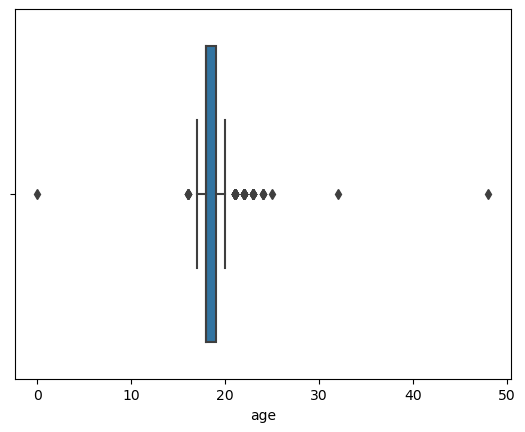

In [10]:
# deteksi persebaran data atribut age / usia mahasiswa

sns.boxplot(x='age', data=df)

In [11]:
# handling data outliers menggunakan median

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df["age_outlier"] = False
for index, row in df.iterrows():
  if row["age"] > upper_bound or row["age"] < lower_bound :
    df.at[index, 'age_outlier'] = True

In [12]:
median = df.groupby("age_outlier")["age"].median()
median[0]

18.0

<AxesSubplot:xlabel='age'>

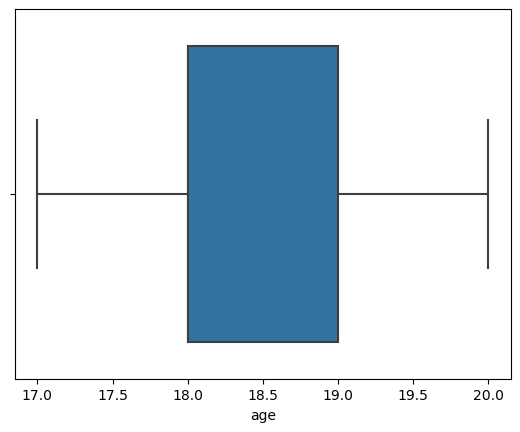

In [13]:
for index, row in df.iterrows():
  if row["age_outlier"] == True:
    df.at[index, 'age'] = median[0]

sns.boxplot(x='age', data=df)

In [14]:
df['age'].value_counts().to_frame()

,age
18,2044
19,648
17,206
20,129


In [15]:
df.drop(['age_outlier',],axis=1,inplace=True)
df.head()

,gender,age,jalur_penerimaan,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,marital,prestasi,label_kelulusan
0,L,18,Reguler,2.45,2.21,2.75,2.43,3.00,2.86,4.00,0.00,1.699328,1.374168,Belum Menikah,Tidak Ada,TERLAMBAT
1,L,18,Reguler,0.47,2.11,1.70,2.39,1.53,1.53,2.06,1.22,3.500000,0.000000,Belum Menikah,Tidak Ada,TERLAMBAT
2,L,20,Reguler,2.09,2.59,3.00,2.87,3.29,0.00,3.00,0.00,0.000000,1.374168,Belum Menikah,Tidak Ada,TERLAMBAT
3,L,20,Reguler,2.16,2.37,2.42,2.75,2.64,2.67,2.00,0.00,0.000000,1.374168,Belum Menikah,Tidak Ada,TERLAMBAT
4,L,19,Reguler,2.24,3.00,3.13,3.05,2.65,1.55,2.14,0.00,1.699328,1.374168,Menikah,Tidak Ada,TERLAMBAT


In [16]:
df.dtypes

gender               object
age                   int64
jalur_penerimaan     object
ips1                float64
ips2                float64
ips3                float64
ips4                float64
ips5                float64
ips6                float64
ips7                float64
ips8                float64
ips9                float64
ips10               float64
marital              object
prestasi             object
label_kelulusan      object
dtype: object

In [17]:
# ganti tipe objek

LE = LabelEncoder()

# Convert feature 'gender'
df['gender'] = LE.fit_transform(df['gender'])
print(LE.classes_)
print(np.sort(df['gender'].unique()))
print('')

# Convert feature 'jalur_penerimaan'
df['jalur_penerimaan'] = LE.fit_transform(df['jalur_penerimaan'])
print(LE.classes_)
print(np.sort(df['jalur_penerimaan'].unique()))
print('')

# Convert feature 'marital'
df['marital'] = LE.fit_transform(df['marital'])
print(LE.classes_)
print(np.sort(df['marital'].unique()))
print('')

# Convert feature 'prestasi'
df['prestasi'] = LE.fit_transform(df['prestasi'])
print(LE.classes_)
print(np.sort(df['prestasi'].unique()))
print('')

# Convert feature 'label_Kelulusan'
df['label_kelulusan'] = LE.fit_transform(df['label_kelulusan'])
print(LE.classes_)
print(np.sort(df['label_kelulusan'].unique()))

['L' 'P']
[0 1]

['PMDK' 'Reguler']
[0 1]

['Belum Menikah' 'Menikah']
[0 1]

['Ada' 'Tidak Ada']
[0 1]

['TEPAT' 'TERLAMBAT']
[0 1]


In [18]:
df.sample(frac=0.007)

,gender,age,jalur_penerimaan,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,marital,prestasi,label_kelulusan
1032,0,18,1,2.4,1.63,2.33,3.32,1.00,2.17,2.69,0.53,2.860000,1.750000,0,1,1
1448,0,17,1,3.6,3.43,3.46,3.13,3.48,3.86,4.00,0.00,1.702214,0.358140,0,1,0
559,0,18,1,2.6,2.27,2.84,1.95,2.17,3.11,2.32,2.36,0.000000,0.000000,0,1,1
397,0,18,1,3.2,2.92,2.86,3.00,3.00,3.50,2.88,3.50,0.000000,0.000000,0,1,1
1910,1,18,1,3.0,3.20,2.74,3.14,3.25,3.11,3.41,4.00,1.702214,0.358140,0,1,0
1487,0,19,1,2.7,3.27,3.39,3.18,3.25,2.70,2.65,2.50,0.000000,0.000000,0,1,1
1346,0,18,1,4.0,3.60,3.91,3.92,3.79,3.74,4.00,4.00,0.000000,0.358140,0,1,0
577,0,18,1,2.4,2.40,2.84,2.52,2.73,2.52,2.59,2.75,0.000000,0.000000,0,1,1
219,0,17,1,2.4,2.50,2.81,2.45,1.74,2.24,2.75,3.63,3.000000,1.374168,0,1,1
1688,0,19,1,3.9,3.60,3.48,3.92,3.38,3.25,4.00,4.00,1.702214,0.358140,0,1,0


In [19]:
df.dtypes

gender                int32
age                   int64
jalur_penerimaan      int32
ips1                float64
ips2                float64
ips3                float64
ips4                float64
ips5                float64
ips6                float64
ips7                float64
ips8                float64
ips9                float64
ips10               float64
marital               int32
prestasi              int32
label_kelulusan       int32
dtype: object

## ***Exploratory Data Analysis (EDA)***

Text(0.5, 1.02, 'Distribusi Waktu Kelulusan Mahasiswa UDINUS')

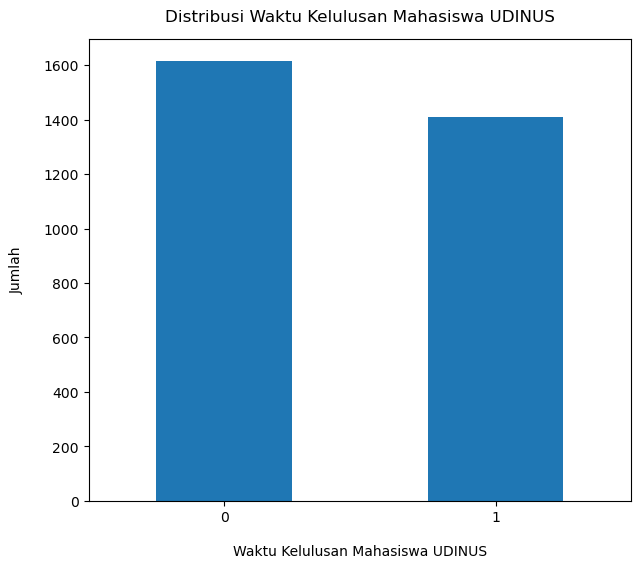

In [20]:
# Melihat distribusi kelas (visualisasi dgn diagram batang dgn library seaborn)
# sns.set (font_scale=1.4)

df['label_kelulusan'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Waktu Kelulusan Mahasiswa UDINUS', labelpad=14)
plt.ylabel('Jumlah', labelpad=14)
plt.title('Distribusi Waktu Kelulusan Mahasiswa UDINUS', y=1.02)

In [21]:
# Melihat distribusi label_kelulusan (jumlahnya tiap kelas)

df['label_kelulusan'].value_counts()

0    1616
1    1411
Name: label_kelulusan, dtype: int64

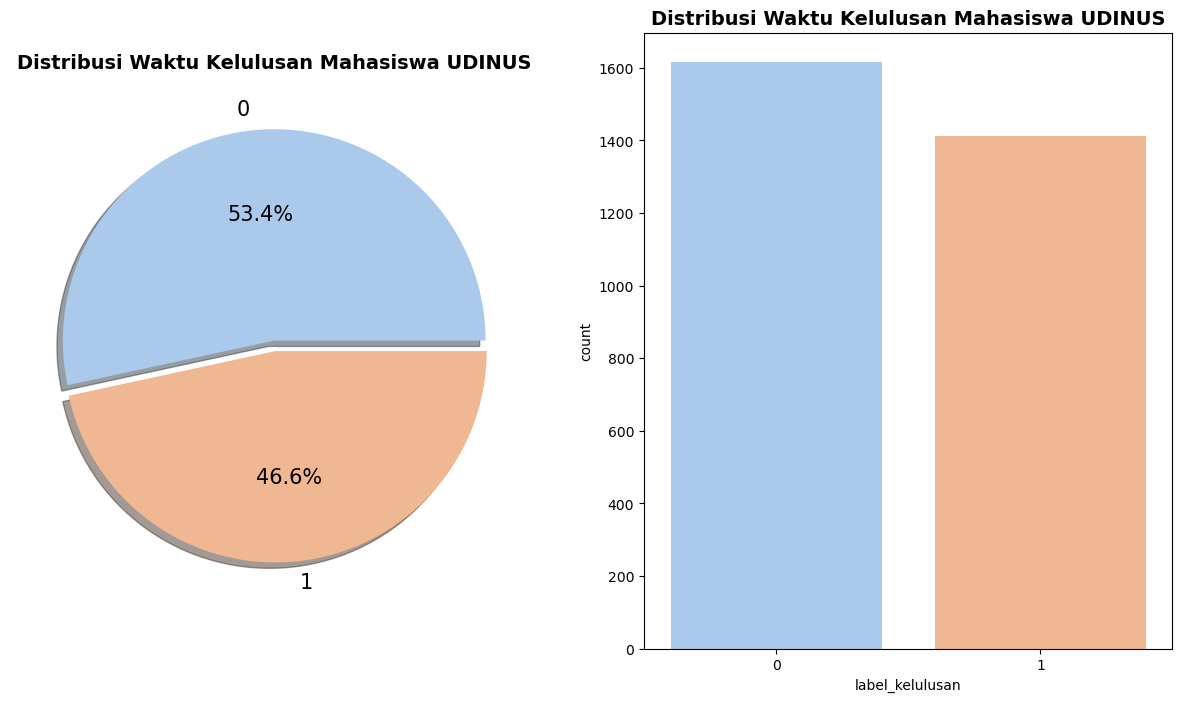

In [22]:
colors = ['#abc9ea', '#efb792']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['label_kelulusan'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True,textprops=dict(size=15))
ax[0].set_title('Distribusi Waktu Kelulusan Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('label_kelulusan',data=df,ax=ax[1], palette='pastel')
ax[1].set_title('Distribusi Waktu Kelulusan Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
plt.show()

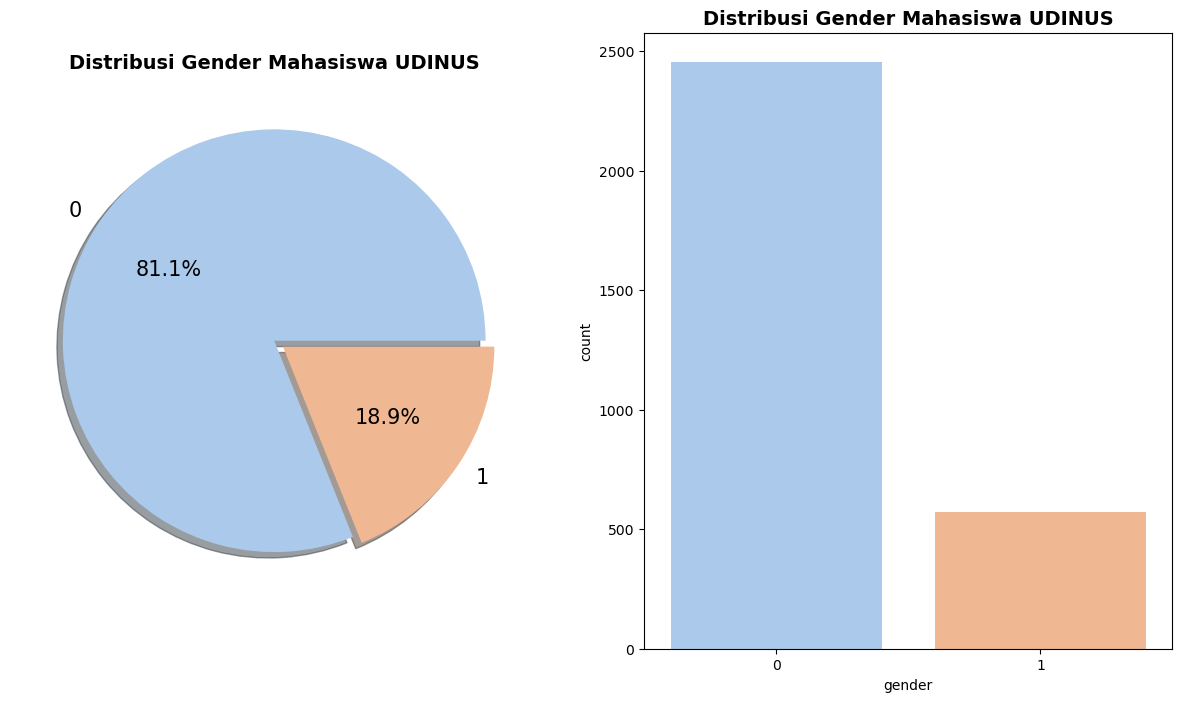

In [23]:
colors = ['#abc9ea', '#efb792']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True,textprops=dict(size=15))
ax[0].set_title('Distribusi Gender Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('gender',data=df,ax=ax[1], palette='pastel')
ax[1].set_title('Distribusi Gender Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
plt.show()

In [24]:
# Melihat distribusi gender (jumlahnya tiap kelas)

df['gender'].value_counts()

0    2454
1     573
Name: gender, dtype: int64

Text(0.5, 1.02, 'Distribusi Usia Mahasiswa UDINUS')

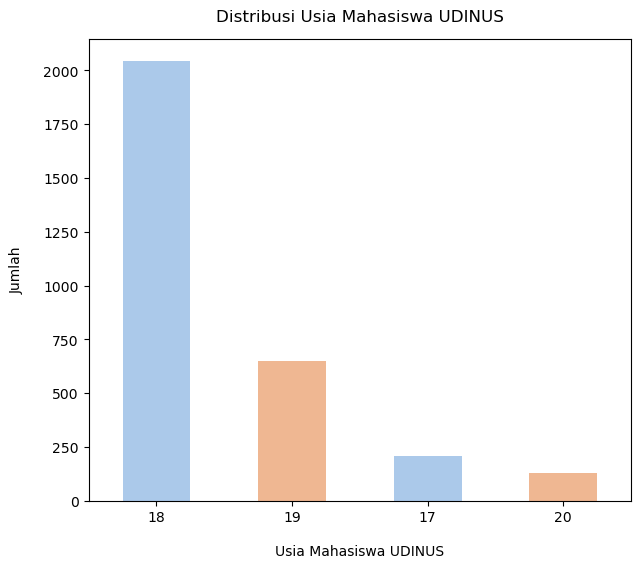

In [25]:
# Melihat distribusi kelas (visualisasi dgn diagram batang dgn library seaborn)
# sns.set (font_scale=1.4)

df['age'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color = ['#abc9ea', '#efb792'])
plt.xlabel('Usia Mahasiswa UDINUS', labelpad=14)
plt.ylabel('Jumlah', labelpad=14)
plt.title('Distribusi Usia Mahasiswa UDINUS', y=1.02)

In [26]:
# Melihat distribusi age (jumlahnya tiap kelas)

df['age'].value_counts()

18    2044
19     648
17     206
20     129
Name: age, dtype: int64

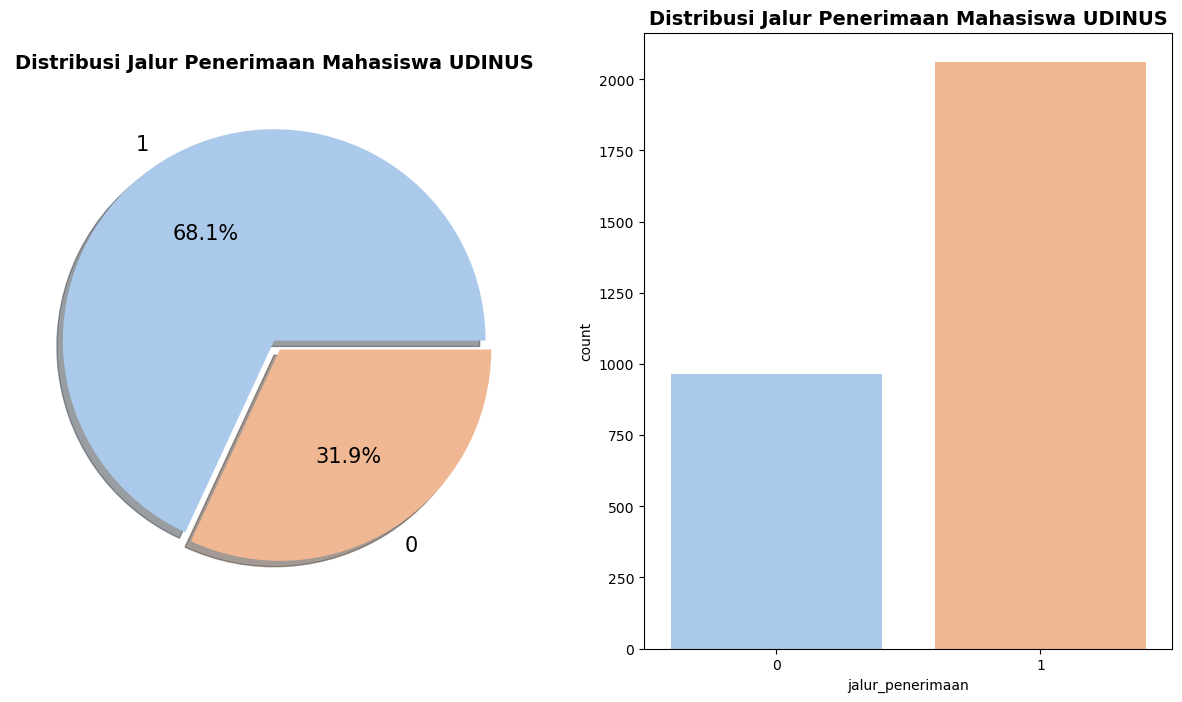

In [27]:
colors = ['#abc9ea', '#efb792']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['jalur_penerimaan'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True,textprops=dict(size=15))
ax[0].set_title('Distribusi Jalur Penerimaan Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('jalur_penerimaan',data=df,ax=ax[1], palette='pastel')
ax[1].set_title('Distribusi Jalur Penerimaan Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
plt.show()

In [28]:
# Melihat distribusi jalur_penerimaan (jumlahnya tiap kelas)

df['jalur_penerimaan'].value_counts()

1    2061
0     966
Name: jalur_penerimaan, dtype: int64

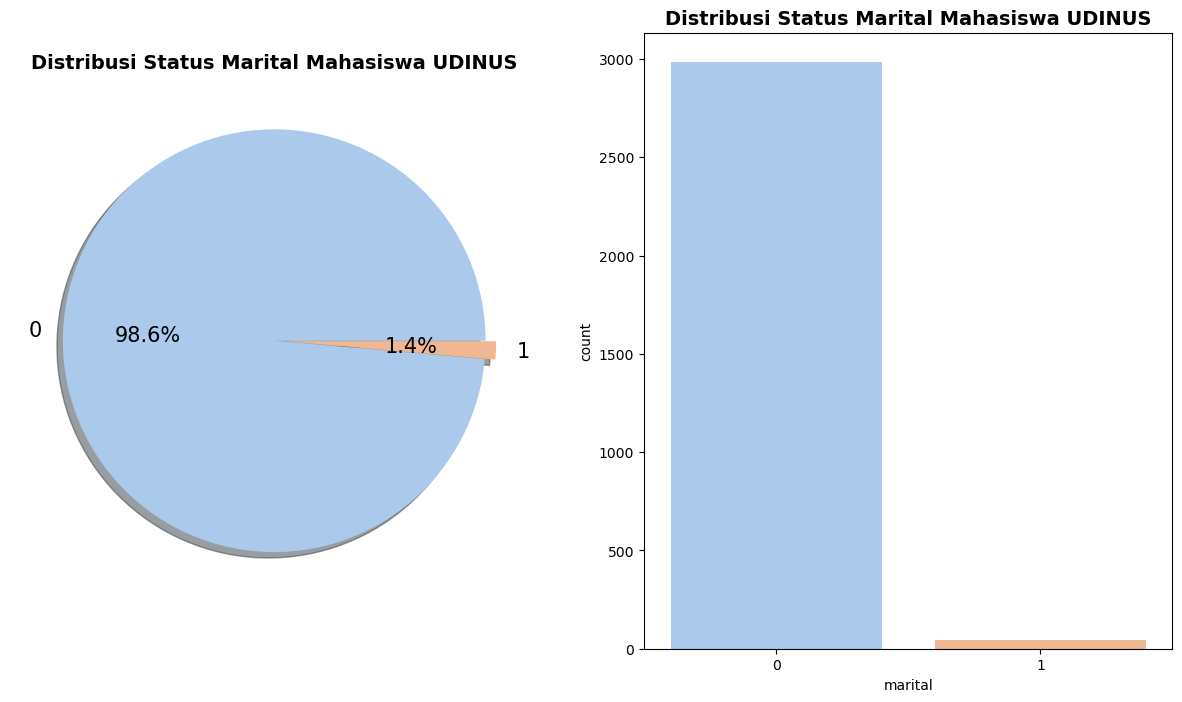

In [29]:
colors = ['#abc9ea', '#efb792']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['marital'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True,textprops=dict(size=15))
ax[0].set_title('Distribusi Status Marital Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('marital',data=df,ax=ax[1], palette='pastel')
ax[1].set_title('Distribusi Status Marital Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
plt.show()

In [30]:
# Melihat distribusi marital (jumlahnya tiap kelas)

df['marital'].value_counts()

0    2985
1      42
Name: marital, dtype: int64

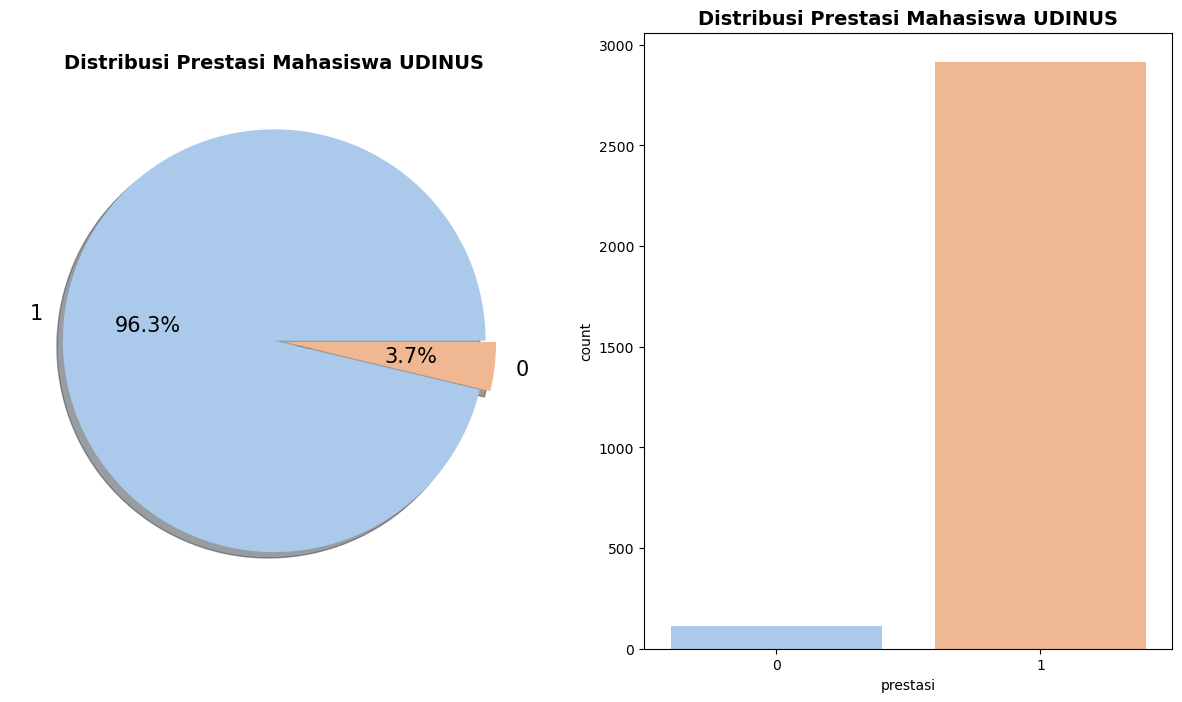

In [31]:
colors = ['#abc9ea', '#efb792']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['prestasi'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],colors=colors,shadow=True,textprops=dict(size=15))
ax[0].set_title('Distribusi Prestasi Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('prestasi',data=df,ax=ax[1], palette='pastel')
ax[1].set_title('Distribusi Prestasi Mahasiswa UDINUS', fontsize = 14, fontweight='bold')
plt.show()

In [32]:
# Melihat distribusi prestasi (jumlahnya tiap kelas)

df['prestasi'].value_counts()

1    2914
0     113
Name: prestasi, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan Gender')

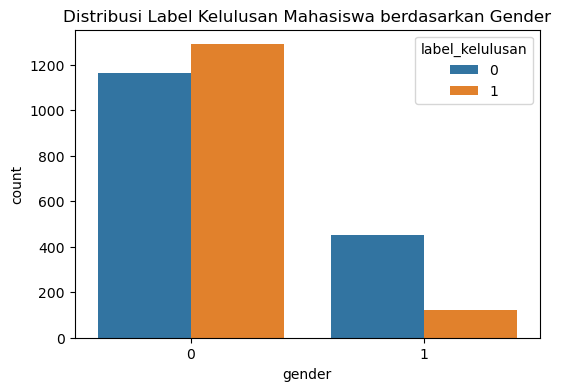

In [33]:
# Melihat distribusi label_kelulusan terhadap gender (jumlahnya tiap kelas)
# ['L = 0', 'P = 1']
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(6,4))
sns.countplot('gender',hue='label_kelulusan',data=df,ax=ax)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Gender')

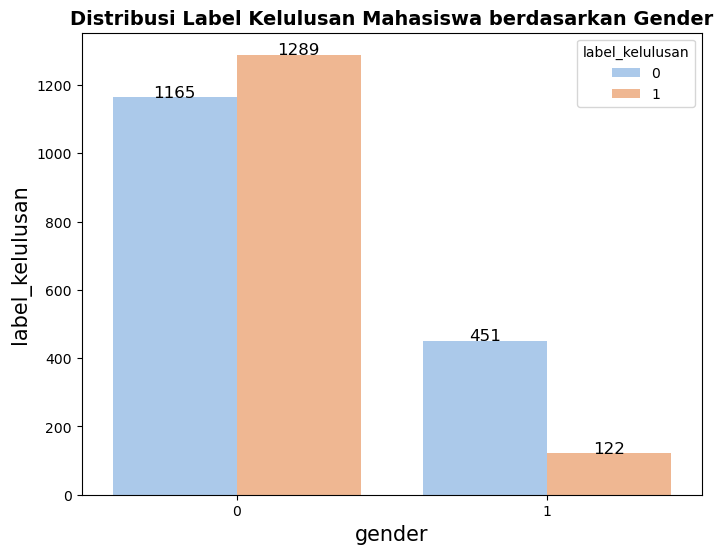

In [34]:
# categorical countplot - show multiple columns

countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'gender', data=df, palette='pastel', hue='label_kelulusan')
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Gender', fontsize = 14, fontweight='bold')
ax.set_xlabel('gender', fontsize = 15)
ax.set_ylabel('label_kelulusan', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 12)

In [35]:
df.groupby(['gender','label_kelulusan'])['label_kelulusan'].count()

gender  label_kelulusan
0       0                  1165
        1                  1289
1       0                   451
        1                   122
Name: label_kelulusan, dtype: int64

laki-laki = lulus tepat waktu 1165
            lulus terlambat   1289
            
perempuan = lulus tepat waktu 451
            lulus terlambat   122         

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan Age')

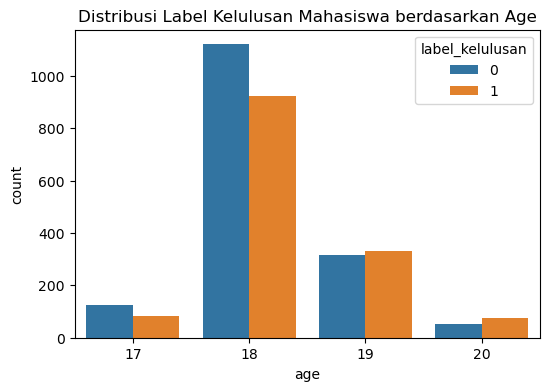

In [36]:
# Melihat distribusi label_kelulusan terhadap age (jumlahnya tiap kelas)
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(6,4))
sns.countplot('age',hue='label_kelulusan',data=df,ax=ax)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Age')

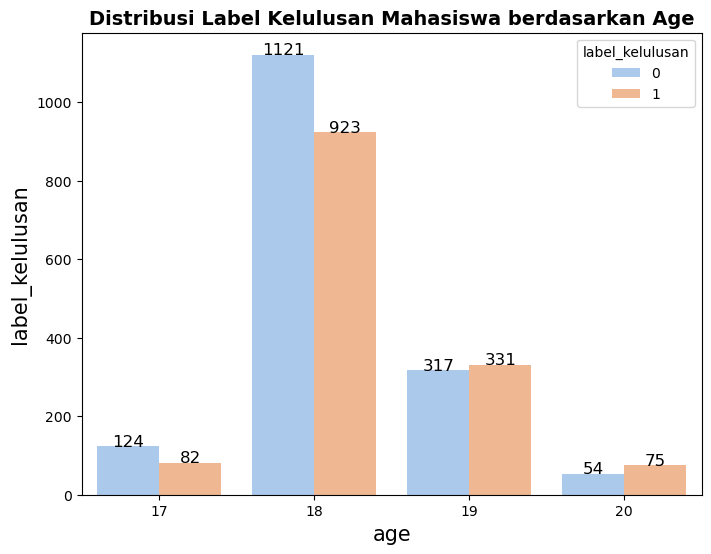

In [37]:
# categorical countplot - show multiple columns

countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'age', data=df, palette='pastel', hue='label_kelulusan')
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Age', fontsize = 14, fontweight='bold')
ax.set_xlabel('age', fontsize = 15)
ax.set_ylabel('label_kelulusan', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 12)

In [38]:
df.groupby(['age','label_kelulusan'])['label_kelulusan'].count()

age  label_kelulusan
17   0                   124
     1                    82
18   0                  1121
     1                   923
19   0                   317
     1                   331
20   0                    54
     1                    75
Name: label_kelulusan, dtype: int64

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan Jalur Penerimaan')

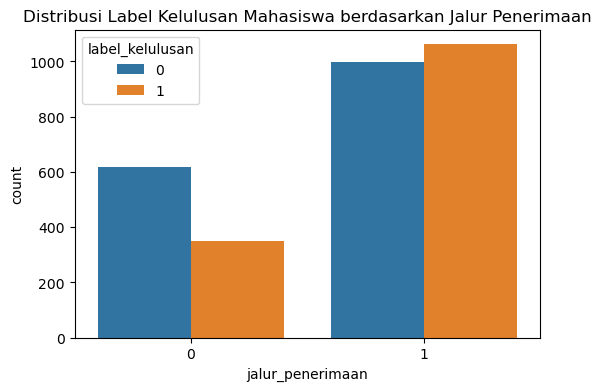

In [39]:
# Melihat distribusi label_kelulusan terhadap jalur_penerimaan (jumlahnya tiap kelas)
# ['PMDK = 0', 'Reguler = 1']
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(6,4))
sns.countplot('jalur_penerimaan',hue='label_kelulusan',data=df,ax=ax)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Jalur Penerimaan')

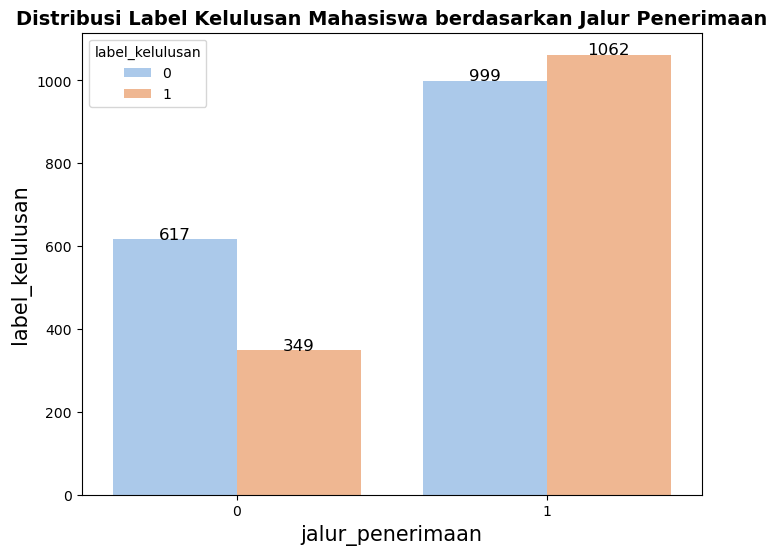

In [40]:
# categorical countplot - show multiple columns

countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'jalur_penerimaan', data=df, palette='pastel', hue='label_kelulusan')
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Jalur Penerimaan', fontsize = 14, fontweight='bold')
ax.set_xlabel('jalur_penerimaan', fontsize = 15)
ax.set_ylabel('label_kelulusan', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 12)

In [41]:
df.groupby(['jalur_penerimaan','label_kelulusan'])['label_kelulusan'].count()

jalur_penerimaan  label_kelulusan
0                 0                   617
                  1                   349
1                 0                   999
                  1                  1062
Name: label_kelulusan, dtype: int64

PMDK      = lulus tepat waktu    617
            lulus terlambat      349
            
Reguler   = lulus tepat waktu    999
            lulus terlambat     1062         

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan Status Marital')

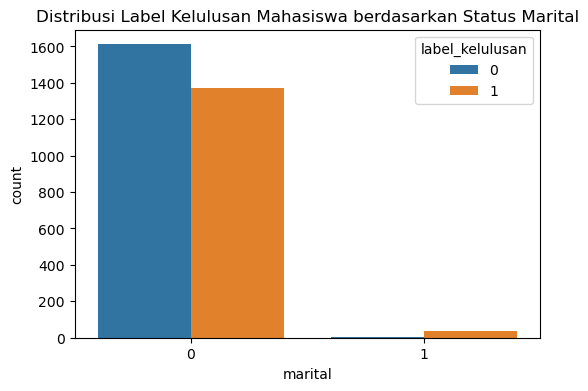

In [42]:
# Melihat distribusi label_kelulusan terhadap gender (jumlahnya tiap kelas)
# ['Belum Menikah = 0', 'Menikah = 1']
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(6,4))
sns.countplot('marital',hue='label_kelulusan',data=df,ax=ax)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Status Marital')

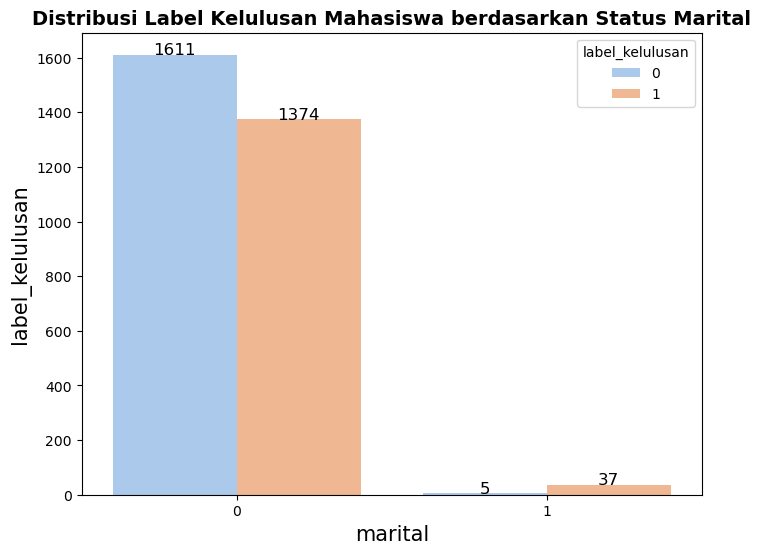

In [43]:
# categorical countplot - show multiple columns

countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'marital', data=df, palette='pastel', hue='label_kelulusan')
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Status Marital', fontsize = 14, fontweight='bold')
ax.set_xlabel('marital', fontsize = 15)
ax.set_ylabel('label_kelulusan', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 12)

In [44]:
df.groupby(['marital','label_kelulusan'])['label_kelulusan'].count()

marital  label_kelulusan
0        0                  1611
         1                  1374
1        0                     5
         1                    37
Name: label_kelulusan, dtype: int64

Belum Menikah = lulus tepat waktu  1611
                lulus terlambat    1374
            
Menikah       = lulus tepat waktu  5
                lulus terlambat    377        

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan Prestasi')

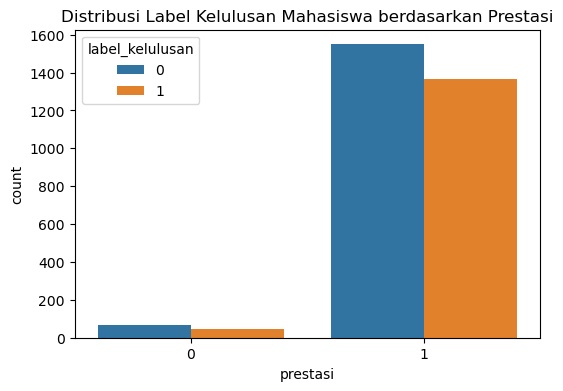

In [45]:
# Melihat distribusi label_kelulusan terhadap gender (jumlahnya tiap kelas)
# ['Ada = 0', 'Tidak Ada = 1']
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(6,4))
sns.countplot('prestasi',hue='label_kelulusan',data=df,ax=ax)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Prestasi')

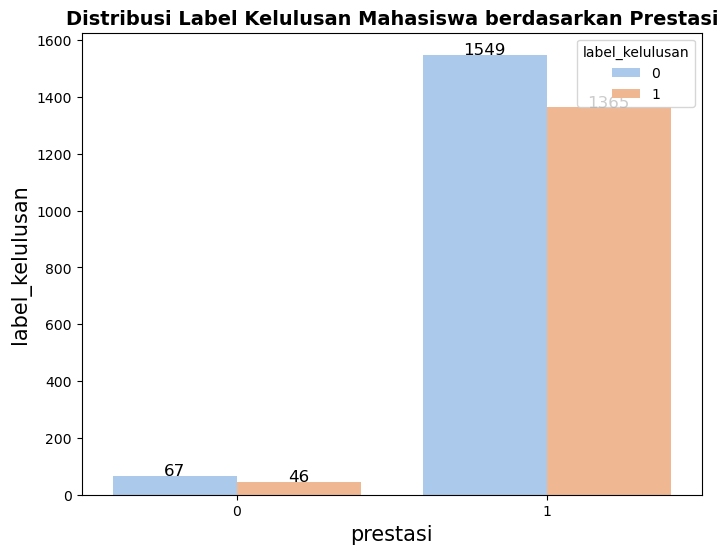

In [46]:
# categorical countplot - show multiple columns

countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'prestasi', data=df, palette='pastel', hue='label_kelulusan')
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan Prestasi', fontsize = 14, fontweight='bold')
ax.set_xlabel('prestasi', fontsize = 15)
ax.set_ylabel('label_kelulusan', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 12)

In [47]:
df.groupby(['prestasi','label_kelulusan'])['label_kelulusan'].count()

prestasi  label_kelulusan
0         0                    67
          1                    46
1         0                  1549
          1                  1365
Name: label_kelulusan, dtype: int64

Ada           = lulus tepat waktu  67
                lulus terlambat    46
            
Tidak Ada     = lulus tepat waktu  1549
                lulus terlambat    1365        

Text(0.5, 1.0, 'Distribusi Label Kelulusan Mahasiswa berdasarkan nilai IPS1')

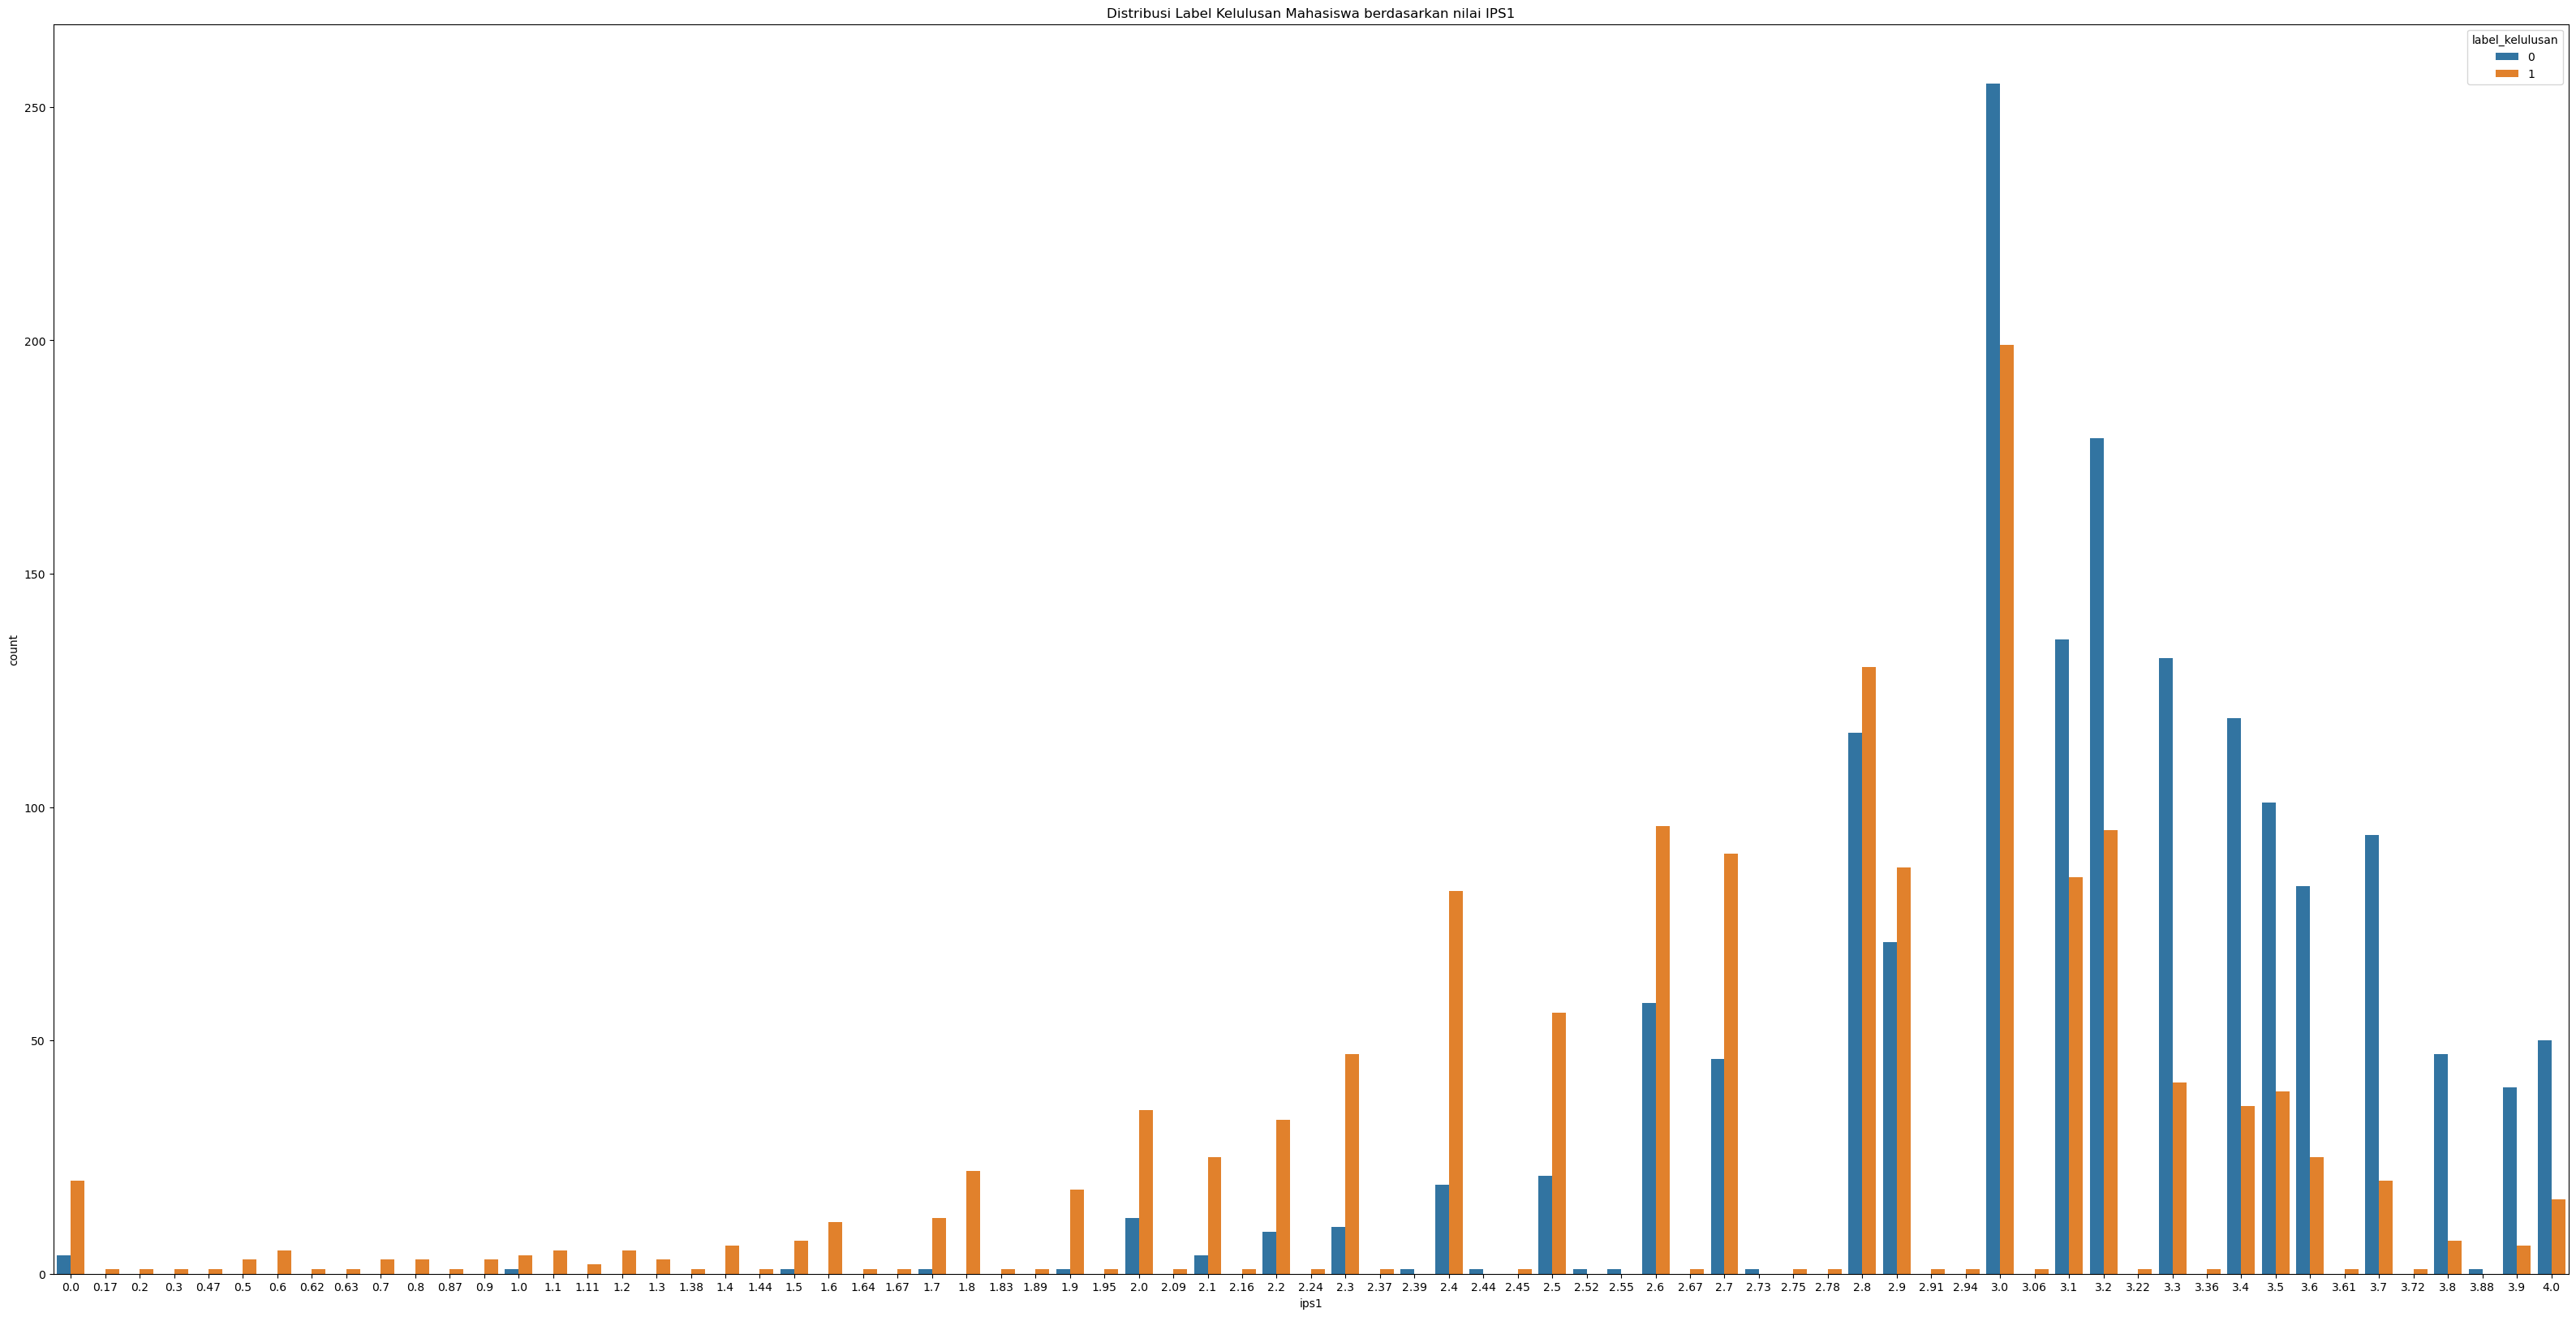

In [48]:
# Melihat distribusi label_kelulusan terhadap gender (jumlahnya tiap kelas)
# ['Ada = 0', 'Tidak Ada = 1']
# ['TEPAT = 0', 'TERLAMBAT = 1']

f,ax=plt.subplots(figsize=(40,20))
sns.countplot('ips1',hue='label_kelulusan',data=df)
ax.set_title('Distribusi Label Kelulusan Mahasiswa berdasarkan nilai IPS1')

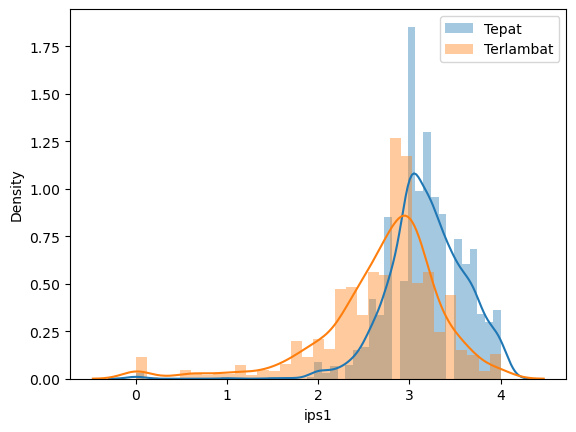

In [49]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips1'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips1'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

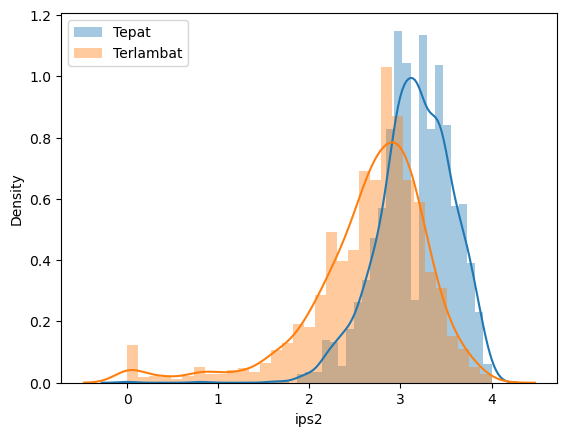

In [50]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips2'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips2'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

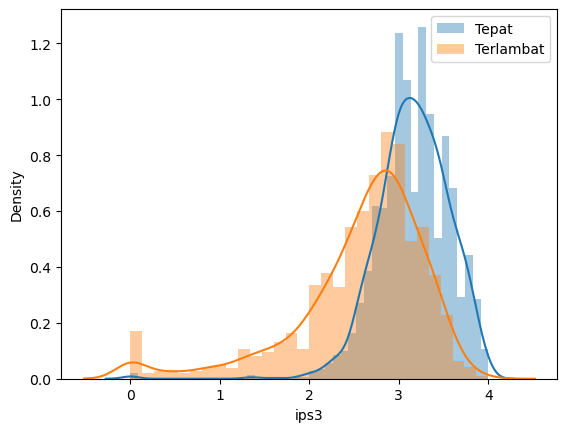

In [51]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips3'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips3'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

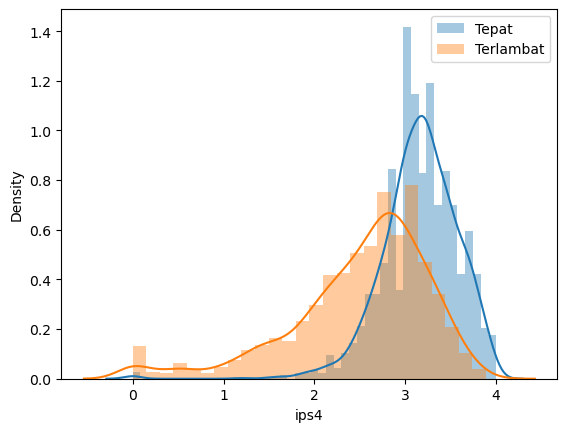

In [52]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips4'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips4'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

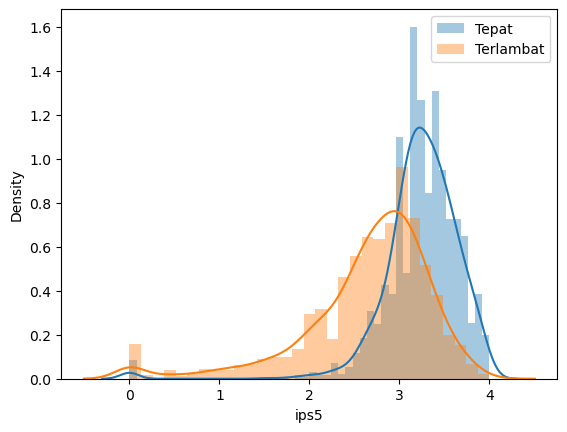

In [53]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips5'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips5'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

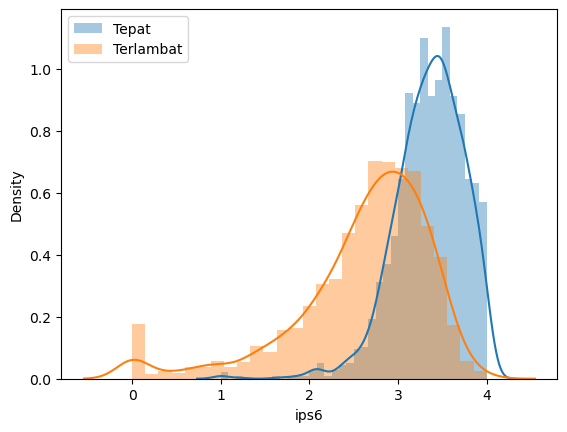

In [54]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips6'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips6'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

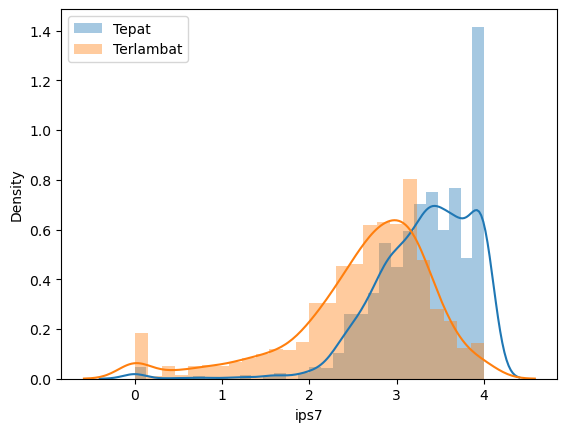

In [55]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips7'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips7'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

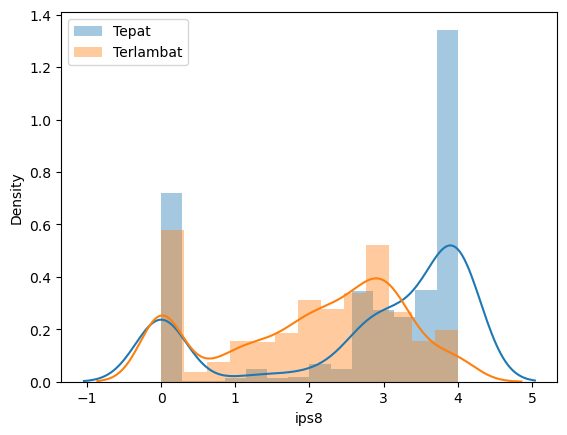

In [56]:
sns.distplot(df[df['label_kelulusan'] == 0]['ips8'], label='Tepat')
sns.distplot(df[df['label_kelulusan'] == 1]['ips8'], label='Terlambat')
plt.ylabel('Density')
plt.legend()
plt.show()

## ***Modelling***

In [57]:
# Membuat variabel X dan y

X = df.drop(columns = ['label_kelulusan'], axis = 1)
y = df['label_kelulusan']

print(f'Dimensi Feature : {X.shape}')
print(f'Class :{set(y)}')

Dimensi Feature : (3027, 15)
Class :{0, 1}


In [58]:
# Split data with 0.15 test size
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.15, random_state = 42)

In [59]:
print(f'Dimensi X_train : {X_train.shape}')
print(f'Dimensi X_test : {X_test.shape}')
print(f'Dimensi y_train : {y_train.shape}')
print(f'Dimensi y_test : {y_test.shape}')

Dimensi X_train : (2572, 15)
Dimensi X_test : (455, 15)
Dimensi y_train : (2572,)
Dimensi y_test : (455,)


In [60]:
y_train.value_counts()

0    1373
1    1199
Name: label_kelulusan, dtype: int64

In [61]:
y_test.value_counts()

0    243
1    212
Name: label_kelulusan, dtype: int64

In [78]:
X_test

,gender,age,jalur_penerimaan,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,marital,prestasi
2820,0,1.391050,0,3.5,3.20,3.54,3.29,3.80,3.94,3.73,4.00,1.702214,0.358140,0,1
2986,0,-0.333549,1,3.0,3.00,3.13,3.33,3.13,3.13,3.83,4.00,1.702214,0.358140,0,1
2653,0,-0.333549,1,3.4,3.20,3.32,3.57,3.36,3.58,3.76,1.82,4.000000,1.374168,0,1
2819,0,-0.333549,0,3.1,2.90,2.77,2.79,3.38,3.68,3.91,4.00,1.702214,0.358140,0,1
537,0,-0.333549,1,1.9,2.56,3.14,2.04,2.58,2.95,3.00,3.00,2.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,0,-0.333549,0,3.4,3.40,3.83,3.63,3.69,3.90,2.40,4.00,1.702214,0.358140,0,1
708,1,-2.058147,1,3.4,3.25,3.30,3.21,3.00,3.12,3.13,0.00,0.000000,0.000000,0,1
1567,0,-0.333549,1,3.2,3.09,3.42,3.50,3.52,3.37,3.40,0.00,1.702214,0.358140,0,1
1685,0,1.391050,0,3.3,2.80,2.43,3.16,2.35,2.63,2.75,2.30,4.000000,0.358140,0,1


In [79]:
y_test

2820    0
2986    0
2653    1
2819    0
537     1
       ..
2743    0
708     1
1567    0
1685    0
1111    1
Name: label_kelulusan, Length: 455, dtype: int32

In [62]:
# Creating function for scaling

from sklearn.preprocessing import StandardScaler

def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [63]:
col_names = ['age']
X_train = Standard_Scaler(X_train, col_names)
X_test = Standard_Scaler(X_test, col_names)

In [64]:
# We are going to ensure that we have the same splits of the data every time. 
# We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [65]:
# Combine SMOTE & TomekLinks

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42))

In [66]:
# Pipeline

SMOTETomek_rf = SMOTETomek_pipeline

In [67]:
# Fit model with balance data

SMOTETomek_rf.fit(X_train, y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=42))])

In [68]:
# Prediksi Data Training

y_pred_train = SMOTETomek_rf.predict(X_train)

In [69]:
# Prediksi Data Testing

y_pred = SMOTETomek_rf.predict(X_test)

In [89]:
y_test

2820    0
2986    0
2653    1
2819    0
537     1
       ..
2743    0
708     1
1567    0
1685    0
1111    1
Name: label_kelulusan, Length: 455, dtype: int32

In [81]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## ***Evaluation***

In [ ]:
# Prediksi pada Data Training

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

print("Accuracy Random Forest:", metrics.accuracy_score(y_train, y_pred_train))
print("")
print(classification_report(y_train, y_pred_train, target_names=LE.classes_))

confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = LE.classes_)

cm_display.plot()
plt.show()

In [ ]:
# Prediksi pada Data Uji

from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

print("Accuracy Random Forest:", metrics.accuracy_score(y_test, y_pred))
print("")
print(classification_report(y_test, y_pred, target_names=LE.classes_))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = LE.classes_)

cm_display.plot()
plt.show()

## ***Saving Model***

In [ ]:
import pickle

In [ ]:
filename = 'KelulusanMahasiswa_Model.pkl'
pickle.dump(SMOTETomek_rf, open(filename,'wb'))

In [ ]:
df.head()

In [ ]:
df.to_excel('datamahasiswa.xlsx', index=False) 